In [1]:
import numpy as np
from experiment_module import ExperimentModule
from sanchez_ansatz import SanchezAnsatz
from qiskit import transpile
from qiskit_algorithms.optimizers import SPSA
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
num_qubits = 3
eps = 0.03

state = np.random.rand(2**num_qubits)
state = state / np.linalg.norm(state)

ansatz = SanchezAnsatz(state, eps)

## Running original
print("--"*50)
print("\t\t Running ORIGINAL Method")
print("--"*50)
init_params = ansatz.init_params
t_ansatz = transpile(ansatz, basis_gates=["cx", "u"])

em_original = ExperimentModule(
                t_ansatz,
                SPSA(maxiter=1000),
                target_state=state,
                init_params=init_params
               )

result_original = em_original.minimize()

## Running modified
print("--"*50)
print("\t\t Running MODIFIED method")
print("--"*50)
ansatz = SanchezAnsatz(state, eps, build_modified=True)

init_params = ansatz.init_params
t_ansatz = transpile(ansatz, basis_gates=["cx", "u"])

em_modified = ExperimentModule(
                t_ansatz,
                SPSA(maxiter=1000),
                target_state=state,
                init_params=init_params
               )

result_modified = em_modified.minimize()


----------------------------------------------------------------------------------------------------
		 Running ORIGINAL Method
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
		 Running MODIFIED method
----------------------------------------------------------------------------------------------------


In [6]:
print("Depth ORIGINAL:", em_original._ansatz.depth())
print("Depth Modified:", em_modified._ansatz.depth())

Depth ORIGINAL: 4
Depth Modified: 71


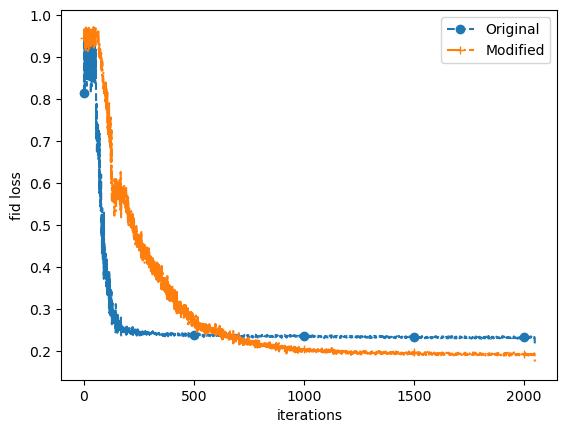

In [12]:
plt.plot(em_original._loss_progression, "--", marker="o", markevery=500, label="Original")
plt.plot(em_modified._loss_progression, "-.", marker="+", markevery=500, label="Modified")
plt.ylabel("fid loss")
plt.xlabel("iterations")
plt.legend(loc="best")
plt.show()